### Step 1: Import Data

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

# Import MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
x_full = mnist.data.values  # Full dataset
y_full = mnist.target.values.astype(int)  # Labels (0–9)

print(f"x_full shape: {x_full.shape}, y_full shape: {y_full.shape}")

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


x_full shape: (70000, 784), y_full shape: (70000,)


### Step 2: Create Subset

In [2]:
# Create a subset of training data (1000 images per digit)
subset_size = 100
x_subset = []
y_subset = []

for digit in range(10):
    digit_indices = np.where(y_full == digit)[0][:subset_size]
    x_subset.append(x_full[digit_indices])
    y_subset.append(y_full[digit_indices])

x_subset = np.vstack(x_subset)
y_subset = np.hstack(y_subset)

print(f"x_subset shape: {x_subset.shape}, y_subset shape: {y_subset.shape}")
print(f"Unique labels in y_subset: {np.unique(y_subset)}")
print(f"x_subset[3].shape: {x_subset[3].shape}")

x_subset shape: (1000, 784), y_subset shape: (1000,)
Unique labels in y_subset: [0 1 2 3 4 5 6 7 8 9]
x_subset[3].shape: (784,)


### Step 3: Apply PCA

In [3]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
n_components = 77
  # Adjustable based on explained variance
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(x_subset)

print(f"Original shape: {x_subset.shape}, PCA shape: {x_pca.shape}")
print(f"variance retained: {np.sum(pca.explained_variance_ratio_)*100}%")

print(f"shape of x_pca: ", x_pca.shape)
print(f"shape of x_pca[0]: ", x_pca[0].shape)

print(f"check any image vector: ", x_pca[999])

Original shape: (1000, 784), PCA shape: (1000, 77)
variance retained: 90.10519206125217%
shape of x_pca:  (1000, 77)
shape of x_pca[0]:  (77,)
check any image vector:  [-624.03192379 -223.34380996  116.51566928  339.74663919 -520.78980354
  320.75999804 -230.80353031 -180.36366372 -158.73406807 -203.88995158
  318.20311212   78.86422438    3.30041904 -428.29225517  -15.08680387
 -149.51107491  124.58687726  191.30847978  216.38218573 -262.47267909
 -135.22782123  -42.33724868 -170.52354757  126.62137974 -174.37914427
  249.24706889   57.78721899  113.21740821   43.82668885   26.48234748
   11.13791421   -5.84539543 -148.22953396   79.6185031  -258.74807535
   13.79911921  -29.65195371   18.12860932   67.75174346 -106.06066631
   32.32050849   58.94969599   53.46087126 -128.36575973 -112.51011267
   76.00195212  -26.44720531  122.22860764  -70.2680359    24.25379263
   17.85185297  -73.57405321  -38.2036553   -58.21173368  -82.07757515
  106.26861705   22.39350632   -9.67475314  -93.901

### Step 4: Preprocess Data

In [4]:
# Thresholding: Convert to binary
threshold_value = 0
x_b = (x_pca > threshold_value).astype(int)

print(f"x_b shape: {x_pca.shape}")
print(f"x_b[4] =", x_b[250])

x_b shape: (1000, 77)
x_b[4] = [1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0
 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0
 1 1 1]


### Install CuPy for CUDA 12.2

In [5]:
!pip install cupy-cuda12x

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 MB 19.2 MB/s eta 0:00:00:00:0100:01


### Step 5: Define Rational Function

In [6]:

# import cupy as cp
# def rational_function(x, alpha, beta):
#     """
#     r(x) = (α_0 + α_1*x1**1 + α_2*x2**2 + α_3*x3**3 + ...) /
#             (β_0 + β_1*x1**1 + β_2*x2**2 + β_3*x3**3 + ...)
#     """
#     # Ensure x is treated as a 1D vector when passed for a single data point
#     x = cp.asarray(x)  # Convert to CuPy array

#     # Numerator polynomial
#     numerator = alpha[0] + alpha[1] * x[0]**1 + alpha[2] * x[1]**2 + alpha[3] * x[2]**3 + alpha[4] * x[3]**4 + alpha[5] * x[4]**5 + alpha[6] * x[5]**6 + alpha[7] * x[6]**7 + alpha[8] * x[7]**8 + alpha[9] * x[8]**9 + alpha[10] * x[9]**10 + alpha[11] * x[10]**11 + alpha[12] * x[11]**12 + alpha[13] * x[12]**13 + alpha[14] * x[13]**14 + alpha[15] * x[14]**15 + alpha[16] * x[15]**16 + alpha[17] * x[16]**17 + alpha[18] * x[17]**18 + alpha[19] * x[18]**19 + alpha[20] * x[19]**20 + alpha[21] * x[20]**21 + alpha[22] * x[21]**22 + alpha[23] * x[22]**23 + alpha[24] * x[23]**24 + alpha[25] * x[24]**25 + alpha[26] * x[25]**26 + alpha[27] * x[26]**27 + alpha[28] * x[27]**28 + alpha[29] * x[28]**29 + alpha[30] * x[29]**30 + alpha[31] * x[30]**31 + alpha[32] * x[31]**32 + alpha[33] * x[32]**33 + alpha[34] * x[33]**34 + alpha[35] * x[34]**35 + alpha[36] * x[35]**36 + alpha[37] * x[36]**37 + alpha[38] * x[37]**38 + alpha[39] * x[38]**39 + alpha[40] * x[39]**40 + alpha[41] * x[40]**41 + alpha[42] * x[41]**42 + alpha[43] * x[42]**43 + alpha[44] * x[43]**44 + alpha[45] * x[44]**45

#     # + alpha[46] * x[45]**46 + alpha[47] * x[46]**47 + alpha[48] * x[47]**48 + alpha[49] * x[48]**49 + alpha[50] * x[49]**50 + alpha[51] * x[50]**51 +

#     # Denominator polynomial
#     denominator = beta[0] + beta[1] * x[0]**1 + beta[2] * x[1]**2 + beta[3] * x[2]**3 + beta[4] * x[3]**4 + beta[5] * x[4]**5 + beta[6] * x[5]**6 + beta[7] * x[6]** + beta[8] * x[7]**8 + beta[9] * x[8]**9 + beta[10] * x[9]**10 + beta[11] * x[10]**11 + beta[12] * x[11]**12 + beta[13] * x[12]**13 + beta[14] * x[13]**14 + beta[15] * x[14]**15 + beta[16] * x[15]**16 + beta[17] * x[16]**17 + beta[18] * x[17]**18 + beta[19] * x[18]**19 + beta[20] * x[19]**20 + beta[21] * x[20]**21 + beta[22] * x[21]**22 + beta[23] * x[22]**23 + beta[24] * x[23]**24 + beta[25] * x[24]**25 + beta[26] * x[25]**26 + beta[27] * x[26]**27 + beta[28] * x[27]**28 + beta[29] * x[28]**29 + beta[30] * x[29]**30 + beta[31] * x[30]**31 + beta[32] * x[31]**32 + beta[33] * x[32]**33 + beta[34] * x[33]**34 + beta[35] * x[34]**35 + beta[36] * x[35]**36 + beta[37] * x[36]**37 + beta[38] * x[37]**38 + beta[39] * x[38]**39 + beta[40] + beta[40] * x[39]**40 + beta[41] * x[40]**41 + beta[42] * x[41]**42 + beta[43] * x[42]**43 + beta[44] * x[43]**44 + beta[45] * x[44]**45

#     # + beta[46] * x[45]**46 + beta[47] * x[46]**47 + beta[48] * x[47]**48 + beta[49] * x[48]**49 + beta[50] * x[49]**50 + beta[51] * x[50]**51 + beta[52] * x[51]**52 + beta[53] * x[52]**53 + beta[54] * x[53]**54 + beta[55] * x[54]**55

#     return numerator / denominator

# # x = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# # alpha = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# # beta = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# # print(f"lenght of x: {len(x)}")
# # print(f"lenght of alpha: {len(alpha)}")
# # print(f"lenght of beta: {len(beta)}")

# # Result = rational_function(x, alpha, beta)
# # print(f"Result: {Result}")

/opt/conda/lib/python3.10/site-packages/cupy/_environment.py:540: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


### Folder

In [7]:
import os

models_dir = "/kaggle/working/models/"  # Kaggle's default working directory

# Ensure the directory exists
os.makedirs(models_dir, exist_ok=True)

### Step 6: Train Classifiers

In [8]:
import pickle
import cupy as cp
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# Feasibility check function
def check_feasibility_and_compute_coefficients(z, x_b, y_binary):
    num_data_points = x_b.shape[0]
    num_coefficients = n_components + 1  # (+1 for constant term)
    delta = 1e-6  # a small positive value

    # Construct G(x) and H(x) matrices for numerator and denominator
    G = cp.zeros((num_data_points, num_coefficients))  # Numerator matrix
    H = cp.zeros((num_data_points, num_coefficients))  # Denominator matrix

    for i in range(num_data_points):
      G[i, 0] = 1
      H[i, 0] = 1
      for j in range(num_coefficients-1):
        G[i, j+1] = x_b[i, j] ** (j+1)
        H[i, j+1] = x_b[i, j] ** (j+1)

    # print(f"G: {G}")
    # print(f"H: {H}")

    # Construct constraints for Ax <= b
    A = []
    b = []

    for i in range(num_data_points):
        f_plus_z = y_binary[i] + z  # Upper bound
        f_minus_z = y_binary[i] - z  # Lower bound

        # Constraint 1: (f(xi) - z) * β^T H(xi) - α^T G(xi) ≤ θ
        # (-G(xi))αT + (f(xi) - z).H(xi)βT + (-1)θ ≤ 0
        constraint_1 = cp.zeros(2 * num_coefficients + 1)
        # (1) Coefficients of α
        constraint_1[0:num_coefficients] = -G[i]
        # (2) Coefficients of β
        constraint_1[num_coefficients:2 * num_coefficients] = (f_minus_z) * H[i]
        # (3) Coefficient of θ (last element)
        constraint_1[-1] = -1
        A.append(constraint_1)
        b.append(0)

        # Constraint 2: α^T G(xi) + (-1).(f(xi) + z) * β^T H(xi) ≤ θ
        # G(xi).αT + (-1)(f(xi) - z).H(xi)βT + (-1)θ ≤ 0
        constraint_2 = cp.zeros(2 * num_coefficients + 1)
        # (1) Coefficients of α
        constraint_2[0:num_coefficients] = G[i]
        # (2) Coefficients of β
        constraint_2[num_coefficients:2 * num_coefficients] = -(f_plus_z) * H[i]
        # (3) Coefficient of θ (last element)
        constraint_2[-1] = -1
        A.append(constraint_2)
        b.append(0)

        # Constraint 3: β^T H(x) ≥ δ
        # (0)α^T + (-H(x)) β^T + (0)θ ≤ -δ
        constraint_3 = cp.zeros(2 * num_coefficients + 1)
        # Coefficient of β
        constraint_3[num_coefficients:2 * num_coefficients] = -H[i]
        A.append(constraint_3)
        b.append(-delta)

    # Convert CuPy arrays to NumPy arrays for SciPy
    A = cp.asnumpy(cp.array(A))
    b = cp.asnumpy(cp.array(b))

    # print(f"A =", len(A))
    # print(f"A: {A[0]}")
    # print(f"len(A[0]): {len(A[0])}")
    # print(f"len(b): {len(b)}")

    # Objective function to minimize θ
    c = cp.asnumpy(cp.zeros(2 * num_coefficients + 1))
    c[-1] = 1  # Only θ has a coefficient in the objective function

    # Solve the linear programming problem (methods: highs, revised simplex)
    result = linprog(c, A_ub=A, b_ub=b, method="highs")

    # Check feasibility and return results
    if result.success:
        alpha_coefficients = result.x[:num_coefficients]
        beta_coefficients = result.x[num_coefficients:2 * num_coefficients]
        theta = result.x[-1]
        return True, alpha_coefficients, beta_coefficients, theta
    else:
        return False, None, None, None


# Bisection loop
def bisection_loop(x_b, y_binary, uL, uH, precision):
    optimal_alpha, optimal_beta, optimal_theta = None, None, None
    z_values = []

    while uH - uL > precision:
        z = (uL + uH) / 2
        z_values.append(z)
        feasible, alpha_coefficients, beta_coefficients, theta = check_feasibility_and_compute_coefficients(z, x_b, y_binary)

        if feasible:
            uH = z
            optimal_alpha, optimal_beta, optimal_theta = alpha_coefficients, beta_coefficients, theta
        else:
            uL = z

    return uH, optimal_alpha, optimal_beta, optimal_theta, z_values

# Train a classifier for each digit
for digit in range(10):
    print(f"Training classifier for digit {digit}...")

    # Assign labels: Positive for the current digit, negative for others
    y_binary = (y_subset == digit).astype(int)

    # Bisection parameters
    uL = 0  # Initial lower bound
    uH = 500  # Initial upper bound
    precision = 1e-2 #1e-6  # Precision threshold

    # Run bisection loop
    optimal_z, optimal_alpha, optimal_beta, optimal_theta, z_values = bisection_loop(x_b, y_binary, uL, uH, precision)

    # Print results
    print(f"Number of Iterations: {len(z_values)}")
    print(f"z Values in all Iterations: {z_values}")
    print(f"Optimal z (Maximum Deviation): {optimal_z}")

    # # Plot convergence of z values
    # plt.figure(figsize=(8, 6))
    # plt.plot(range(len(z_values)), z_values, marker='o', linestyle='-')
    # plt.xlabel("Iteration")
    # plt.ylabel("z Value")
    # plt.title("Convergence of z Values")
    # plt.grid(True)
    # plt.show()

    print(f"Optimized Coefficients (Numerator α): {optimal_alpha}")
    print(f"Optimized Coefficients (Denominator β): {optimal_beta}")
    print(f"Optimal θ: {optimal_theta}")
    # print(f"rational_function =", rational_function(x_b[0], optimal_alpha, optimal_beta))

    # Save the model
    model = {
        "alpha": optimal_alpha,
        "beta": optimal_beta,
        "theta": optimal_theta,
        "n_components": n_components
    }

    with open(f"{models_dir}classifier_{digit}.pkl", "wb") as file:
        pickle.dump(model, file)

    print(f"Model for digit {digit} saved at {models_dir}")

Training classifier for digit 0...
Number of Iterations: 16
z Values in all Iterations: [250.0, 125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125]
Optimal z (Maximum Deviation): 0.00762939453125
Optimized Coefficients (Numerator α): [ 5.e-07 -0.e+00 -0.e+00 -0.e+00 -0.e+00 -0.e+00  0.e+00 -0.e+00  0.e+00
  0.e+00  0.e+00 -0.e+00 -0.e+00 -0.e+00  0.e+00 -0.e+00 -0.e+00 -0.e+00
 -0.e+00 -0.e+00 -0.e+00 -0.e+00  0.e+00 -0.e+00 -0.e+00 -0.e+00 -0.e+00
 -0.e+00 -0.e+00 -0.e+00 -0.e+00 -0.e+00 -0.e+00 -0.e+00 -0.e+00 -0.e+00
  0.e+00 -0.e+00 -0.e+00 -0.e+00 -0.e+00 -0.e+00  0.e+00 -0.e+00  0.e+00
 -0.e+00  0.e+00  0.e+00  0.e+00 -0.e+00 -0.e+00 -0.e+00  0.e+00 -0.e+00
 -0.e+00 -0.e+00 -0.e+00 -0.e+00  0.e+00  0.e+00  0.e+00  0.e+00 -0.e+00
 -0.e+00 -0.e+00  0.e+00 -0.e+00 -0.e+00 -0.e+00 -0.e+00  0.e+00  0.e+00
  0.e+00 -0.e+00 -0.e+00 -0.e+00  0.e+00 -0.e+00]
Optimized Coe

sdsd

PCA applied to test data.
Shape of original test subset: (10000, 784)
Shape of PCA-transformed test subset: (10000, 77)
Binary thresholded test subset: (10000, 77)
Accuracy for digit 0: 0.10
Accuracy for digit 1: 0.91
Accuracy for digit 2: 0.90
Accuracy for digit 3: 0.90
Accuracy for digit 4: 0.90
Accuracy for digit 5: 0.90
Accuracy for digit 6: 0.90
Accuracy for digit 7: 0.90
Accuracy for digit 8: 0.90
Accuracy for digit 9: 0.90
Overall Accuracy: 0.82


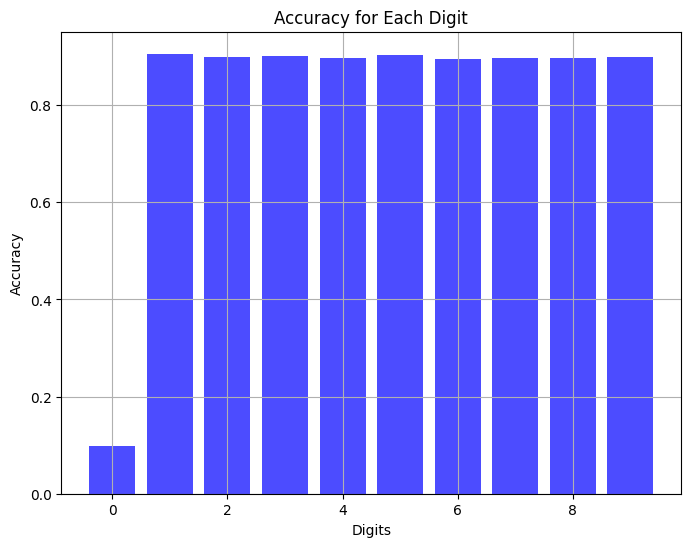

In [30]:
import cupy as cp
import numpy as np
from sklearn.decomposition import PCA
import pickle
import matplotlib.pyplot as plt

# Define the rational function
def rational_function(x, alpha, beta):
    """
    r(x) = (α_0 + α_1*x1**1 + α_2*x2**2 + ...) / 
           (β_0 + β_1*x1**1 + β_2*x2**2 + ...).
    """
    numerator = alpha[0] + sum(alpha[i+1] * x[i] ** (i + 1) for i in range(len(x)))
    denominator = beta[0] + sum(beta[i+1] * x[i] ** (i + 1) for i in range(len(x)))
    return numerator / denominator

# Set the desired number of test images
desired_num_test_images = 10000  # Change this to any desired number

# Load the test dataset (use your MNIST data here)
# Assuming x_test contains 10,000 test images
x_test = np.random.rand(10000, 784)  # Replace this with actual MNIST test images
y_test = np.random.randint(0, 10, 10000)  # Replace with actual test labels

# Subset the test dataset
x_test_subset = x_test[:desired_num_test_images]
y_test_subset = y_test[:desired_num_test_images]

# Apply PCA to test data
n_components = 77  # Desired number of components
pca = PCA(n_components=n_components)
x_test_pca = pca.fit_transform(x_test_subset)

# Thresholding: Convert PCA-transformed data to binary (0s and 1s)
threshold_value = 0
x_test_binary = (x_test_pca > threshold_value).astype(int)

print("PCA applied to test data.")
print(f"Shape of original test subset: {x_test_subset.shape}")
print(f"Shape of PCA-transformed test subset: {x_test_pca.shape}")
print(f"Binary thresholded test subset: {x_test_binary.shape}")

# Load the saved models and test
models_dir = "/kaggle/working/models/"  # Update based on your environment
accuracies = []

for digit in range(10):
    # Load model for each digit
    with open(f"{models_dir}classifier_{digit}.pkl", "rb") as file:
        model = pickle.load(file)

    alpha = model["alpha"]
    beta = model["beta"]
    theta = model["theta"]

    # Evaluate the rational function for each test data point
    y_predicted = [
        rational_function(x, alpha, beta) for x in x_test_binary
    ]

    # Convert predictions to binary (1 for this digit, 0 for others)
    y_pred_binary = np.array(y_predicted) > 0.5
    y_true_binary = y_test_subset == digit

    # Calculate accuracy for this digit
    accuracy = np.mean(y_pred_binary == y_true_binary)
    accuracies.append(accuracy)

    print(f"Accuracy for digit {digit}: {accuracy:.2f}")

# Calculate and print overall accuracy
overall_accuracy = np.mean(accuracies)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Plotting accuracies for each digit
plt.figure(figsize=(8, 6))
plt.bar(range(10), accuracies, color='blue', alpha=0.7)
plt.xlabel("Digits")
plt.ylabel("Accuracy")
plt.title("Accuracy for Each Digit")
plt.grid(True)
plt.show()